#Preconfig

##Importing Librarries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', None)

##Getting the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Current projects/Hacker earth/Resolving citizens’ grievances
!ls

/content/gdrive/MyDrive/Current projects/Hacker earth/Resolving citizens’ grievances
sample_submission.csv  test.csv  test_pred.csv	train.csv


In [ ]:
grievances_data = pd.read_csv("train.csv", low_memory=False)

#Preprocessing

In [ ]:
grievances_data = pd.read_csv("train.csv", low_memory=False)

In [ ]:
grievances_data.drop(columns=["importance", "appno", "application","languageisocode", "originatingbody_type", "ecli","sharepointid", "itemid"], axis=1, inplace=True) #Removing only one values

In [ ]:
zero_list_50 = []
zero_list_plus50 = []
# print(grievances_data.shape[1])
for i in range(0, grievances_data.shape[1]):
    ZeroCount = grievances_data.iloc[:, i].isna().sum()
    if ZeroCount > 50:
      zero_list_plus50.append(grievances_data.columns[i])
      # print(grievances_data.columns[i], "======", ZeroCount)
    elif ZeroCount < 50 and ZeroCount > 0:
      zero_list_50.append(grievances_data.columns[i])
      # print(grievances_data.columns[i], "======", ZeroCount)

print(zero_list_50)
print(zero_list_plus50)

['parties.1']
['decisiondate', 'introductiondate', 'issue.0', 'issue.1', 'issue.10', 'issue.11', 'issue.12', 'issue.13', 'issue.14', 'issue.15', 'issue.16', 'issue.17', 'issue.18', 'issue.19', 'issue.2', 'issue.20', 'issue.21', 'issue.22', 'issue.23', 'issue.24', 'issue.25', 'issue.26', 'issue.3', 'issue.4', 'issue.5', 'issue.6', 'issue.7', 'issue.8', 'issue.9', 'parties.2', 'respondent.1', 'respondent.2', 'respondent.3', 'respondent.4']


In [ ]:
grievances_data = grievances_data.drop(labels=zero_list_plus50, axis=1) #too many zero values
grievances_data = grievances_data.drop(labels="country.name", axis=1)   #repetions

In [ ]:
print(grievances_data.dtypes.unique())

object_list = []
float_list = []
bool_list = []
o_list = []

datatype_series = grievances_data.dtypes
for i in range(0, len(datatype_series)):
  if datatype_series[i] == "object":
    object_list.append(datatype_series.index[i])
  if datatype_series[i] == "float":
    float_list.append(datatype_series.index[i])
  if datatype_series[i] == "bool":
    bool_list.append(datatype_series.index[i])
  if datatype_series[i] == "O":
    o_list.append(datatype_series.index[i])
print(object_list)
print(float_list)
print(bool_list)
print(o_list)

[dtype('O') dtype('int64') dtype('float64') dtype('bool')]
['country.alpha2', 'docname', 'doctypebranch', 'judgementdate', 'kpdate', 'originatingbody_name', 'parties.0', 'parties.1', 'respondent.0']
['rank']
['separateopinion']
['country.alpha2', 'docname', 'doctypebranch', 'judgementdate', 'kpdate', 'originatingbody_name', 'parties.0', 'parties.1', 'respondent.0']


In [ ]:
temp = grievances_data[object_list].apply(pd.Series.unique)
OneHotEncoderVals = []
Remove_object_list = []
# print(temp)
for i in range(0, len(temp)):
  print(temp.index[i], len(temp[i]))
  if len(temp[i]) < 100:
    OneHotEncoderVals.append(temp.index[i])
  else:
    Remove_object_list.append(temp.index[i])
print(OneHotEncoderVals)
print(Remove_object_list)

country.alpha2 46
docname 8682
doctypebranch 3
judgementdate 1906
kpdate 1906
originatingbody_name 13
parties.0 8361
parties.1 94
respondent.0 46
['country.alpha2', 'doctypebranch', 'originatingbody_name', 'parties.1', 'respondent.0']
['docname', 'judgementdate', 'kpdate', 'parties.0']


In [ ]:
grievances_data = grievances_data.drop(labels=Remove_object_list, axis=1)

In [ ]:
grievances_data["rank"] = grievances_data["rank"].astype(int)
grievances_data["separateopinion"] = grievances_data["separateopinion"].astype(int)

In [ ]:
grievances_data[OneHotEncoderVals].describe()

,country.alpha2,doctypebranch,originatingbody_name,parties.1,respondent.0
count,8878,8878,8878,8874,8878
unique,46,3,13,93,46
top,ru,CHAMBER,First Section,RUSSIA,RUS
freq,1647,6822,1699,1645,1647


In [ ]:
grievances_data = grievances_data.drop(labels="parties.1", axis=1)
OneHotEncoderVals.remove("parties.1")
print(OneHotEncoderVals)

['country.alpha2', 'doctypebranch', 'originatingbody_name', 'respondent.0']


In [ ]:
grievances_data_notcat = grievances_data.drop(OneHotEncoderVals, axis=1)
grievances_data_cat= grievances_data[OneHotEncoderVals]

encoder = OneHotEncoder(sparse=False)
grievances_data_cat_ohe = pd.DataFrame(encoder.fit_transform(grievances_data_cat), columns=encoder.get_feature_names())
grievances_data_cat_ohe.head()


,x0_ad,x0_al,x0_am,x0_at,x0_az,x0_ba,x0_be,x0_bg,x0_ch,x0_cy,x0_cz,x0_de,x0_dk,x0_ee,x0_es,x0_fi,x0_fr,x0_gb,x0_ge,x0_gr,x0_hr,x0_hu,x0_ie,x0_is,x0_it,x0_li,x0_lt,x0_lu,x0_lv,x0_md,x0_me,x0_mk,x0_mt,x0_nl,x0_no,x0_pl,x0_pt,x0_ro,x0_rs,x0_ru,x0_se,x0_si,x0_sk,x0_sm,x0_tr,x0_ua,x1_CHAMBER,x1_COMMITTEE,x1_GRANDCHAMBER,x2_Chamber,x2_First Section,x2_First Section Committee,x2_Fith Section,x2_Fith Section Committee,x2_Fourth Section,x2_Fourth Section Committee,x2_Grand Chamber,x2_Plenary,x2_Second Section,x2_Second Section Committee,x2_Third Section,x2_Third Section Committee,x3_ALB,x3_AND,x3_ARM,x3_AUT,x3_AZE,x3_BEL,x3_BGR,x3_BIH,x3_CHE,x3_CYP,x3_CZE,x3_DEU,x3_DNK,x3_ESP,x3_EST,x3_FIN,x3_FRA,x3_GBR,x3_GEO,x3_GRC,x3_HRV,x3_HUN,x3_IRL,x3_ISL,x3_ITA,x3_LIE,x3_LTU,x3_LUX,x3_LVA,x3_MDA,x3_MKD,x3_MLT,x3_MNE,x3_NLD,x3_NOR,x3_POL,x3_PRT,x3_ROU,x3_RUS,x3_SMR,x3_SRB,x3_SVK,x3_SVN,x3_SWE,x3_TUR,x3_UKR
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# grievances_data_1 = grievances_data_notcat.append(grievances_data_cat_ohe.astype(int))
grievances_data_1 = pd.concat([grievances_data_notcat, grievances_data_cat_ohe.astype(int)], axis=1)
grievances_data_1.head()

,originatingbody,rank,respondentOrderEng,separateopinion,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,article=56,article=39,article=15,article=25,article=P6,article=19,article=32,article=33,article=53,article=28,article=43,article=52,article=P13,article=16,documentcollectionid=CASELAW,documentcollectionid=JUDGMENTS,documentcollectionid=CHAMBER,documentcollectionid=ENG,documentcollectionid=COMMITTEE,documentcollectionid=GRANDCHAMBER,applicability=,applicability=36,applicability=43,applicability=41,applicability=55,applicability=3,applicability=22,applicability=60,applicability=58,applicability=25,applicability=47,applicability=12,applicability=38,applicability=20,applicability=18,applicability=24,applicability=62,applicability=21,applicability=23,applicability=8,applicability=26,applicability=53,applicability=15,applicability=48,applicability=14,applicability=51,applicability=13,applicability=5,applicability=7,applicability=50,applicability=52,applicability=28,applicability=29,applicability=31,applicability=6,applicability=81,applicability=66,applicability=49,applicability=33,applicability=63,applicability=68,applicability=46,applicability=19,applicability=40,applicability=17,applicability=32,applicability=72,applicability=34,applicability=35,applicability=54,applicability=27,applicability=16,applicability=64,applicability=57,applicability=56,applicability=2,applicability=4,applicability=67,applicability=77,applicability=71,applicability=59,paragraphs=3,paragraphs=6,paragraphs=6-1,paragraphs=6-3-c,paragraphs=P1-3,paragraphs=5,paragraphs=5-1,paragraphs=P1-1,paragraphs=8,paragraphs=8-1,paragraphs=13,paragraphs=10,paragraphs=10-2,paragraphs=10-1,paragraphs=35-1,paragraphs=2,paragraphs=2-1,paragraphs=34,paragraphs=41,paragraphs=38,paragraphs=35,paragraphs=8-2,paragraphs=35-3-a,paragraphs=29-3,paragraphs=4,paragraphs=29,paragraphs=P1-1-1,paragraphs=5-1-e,paragraphs=6-2,paragraphs=5-1-c,paragraphs=14,paragraphs=35-3,paragraphs=6-3-d,paragraphs=5-1-b,paragraphs=5-5,paragraphs=P12-1,paragraphs=11-1,paragraphs=11-2,paragraphs=9,paragraphs=9-1,paragraphs=1,paragraphs=11,paragraphs=6-3,paragraphs=5-3,paragraphs=5-4,paragraphs=46,paragraphs=46-2,paragraphs=5-1-a,paragraphs=P4-2,paragraphs=P4-2-2,paragraphs=17,paragraphs=18,paragraphs=7,paragraphs=7-1,paragraphs=,paragraphs=4-3-d,paragraphs=4-2,paragraphs=6-3-e,paragraphs=9-2,paragraphs=P1-1-2,paragraphs=P4-2-1,paragraphs=37-1-c,paragraphs=37,paragraphs=P7-4,paragraphs=4-1,paragraphs=57,paragraphs=6-3-b,paragraphs=35-3-b,paragraphs=5-1-f,paragraphs=35-4,paragraphs=P4-2-3,paragraphs=2-2,paragraphs=26,paragraphs=27-2,paragraphs=27,paragraphs=36,paragraphs=36-1,paragraphs=37-1,paragraphs=P7-2,paragraphs=35-2,paragraphs=5-1-d,paragraphs=6-3-a,paragraphs=30,paragraphs=46-1,paragraphs=12,paragraphs=P7-1,paragraphs=P7-1-1,paragraphs=36-2,paragraphs=5-2,paragraphs=P1-2,paragraphs=P1-4,paragraphs=56-3,paragraphs=56,paragraphs=56-1,paragraphs=P7-1-2,paragraphs=38-1-a,paragraphs=37-1-b,paragraphs=39,paragraphs=15-1,paragraphs=15,paragraphs=7-2,paragraphs=P4-4,paragraphs=15-3,paragraphs=25-1,paragraphs=25,paragraphs=37-1-a,paragraphs=P6-1,paragraphs=P7-5,paragraphs=19,paragraphs=32,paragraphs=P7-3,paragraphs=33,paragraphs=28-1-a,paragraphs=53,paragraphs=28,paragraphs=35-2-b,paragraphs=43,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,

In [ ]:
grievances_data_1.head(5)

In [ ]:
grievances_data.head(5)

In [ ]:
grievances_data_1 = grievances_data_1.astype(int) # .drop(["x2_Plenary","x2_Chamber"], axis=1)
print(grievances_data_1.dtypes.unique())

[dtype('int64')]


#Training

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


# scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler = RobustScaler()


X = grievances_data_1

y = pd.read_csv("train.csv", low_memory=False)["importance"]

X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(7102, 384) (1776, 384) (7102,) (1776,)


In [ ]:
b = np.array(y.value_counts())
print(b)
print((b/y.shape)*100)
b = np.array(y_train.value_counts())
print((b/y_train.shape)*100)
b = np.array(y_test.value_counts())
print((b/y_test.shape)*100)

[5774 2011  582  511]
[65.03717053 22.65149809  6.55553052  5.75580086]
[65.24922557 22.3880597   6.47704872  5.88566601]
[64.18918919 23.70495495  6.86936937  5.23648649]


#Validation curves

##max_depth

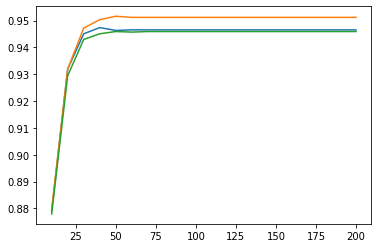

In [ ]:
from sklearn.model_selection import validation_curve
the_class = RandomForestClassifier(n_estimators=410, min_samples_split=10, max_features= 66, min_samples_leaf=1, max_leaf_nodes=None, random_state=42)
num_est = list(np.linspace(10, 200, 20, dtype=int))


train_scoreNum, test_scoreNum = validation_curve(
                                the_class,
                                X = X_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = num_est, cv = 3)

plt.plot(num_est, train_scoreNum)
plt.show()

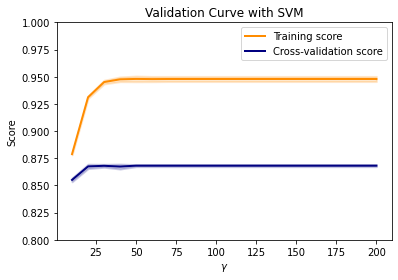

In [ ]:
train_scoreNum_mean = np.mean(train_scoreNum, axis=1)
train_scoreNum_std = np.std(train_scoreNum, axis=1)
test_scoreNum_mean = np.mean(test_scoreNum, axis=1)
test_scoreNum_std = np.std(test_scoreNum, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.8, 1)
lw = 2
plt.plot(num_est, train_scoreNum_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(num_est, train_scoreNum_mean - train_scoreNum_std,
                 train_scoreNum_mean + train_scoreNum_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(num_est, test_scoreNum_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(num_est, test_scoreNum_mean - test_scoreNum_std,
                 test_scoreNum_mean + test_scoreNum_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

##max_features_1

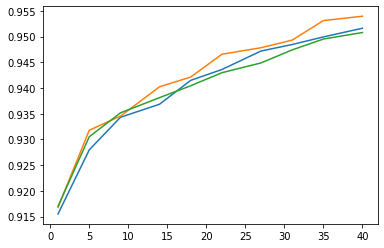

In [ ]:
from sklearn.model_selection import validation_curve
the_class = RandomForestClassifier(n_estimators=410, max_depth=50, min_samples_split=10, min_samples_leaf=1, max_leaf_nodes=None, random_state=42)
num_est = list(np.linspace(1, 40, 10, dtype=int))


train_scoreNum, test_scoreNum = validation_curve(
                                the_class,
                                X = X_train, y = y_train, 
                                param_name = 'max_features', 
                                param_range = num_est, cv = 3)

# plt.plot(num_est, train_scoreNum)
# plt.show()

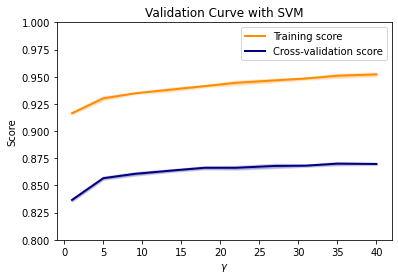

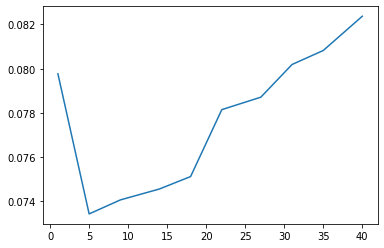

In [ ]:
train_scoreNum_mean = np.mean(train_scoreNum, axis=1)
train_scoreNum_std = np.std(train_scoreNum, axis=1)
test_scoreNum_mean = np.mean(test_scoreNum, axis=1)
test_scoreNum_std = np.std(test_scoreNum, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.8, 1)
lw = 2
plt.plot(num_est, train_scoreNum_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(num_est, train_scoreNum_mean - train_scoreNum_std,
                 train_scoreNum_mean + train_scoreNum_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(num_est, test_scoreNum_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(num_est, test_scoreNum_mean - test_scoreNum_std,
                 test_scoreNum_mean + test_scoreNum_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

plt.plot(num_est, train_scoreNum_mean- test_scoreNum_mean)
plt.show()

##max_features_2

In [ ]:
from sklearn.model_selection import validation_curve
the_class = RandomForestClassifier(n_estimators=410, max_depth=50, min_samples_split=10, min_samples_leaf=1, max_leaf_nodes=None, random_state=42)
num_est = list(np.linspace(40, 80, 10, dtype=int))


train_scoreNum, test_scoreNum = validation_curve(
                                the_class,
                                X = X_train, y = y_train, 
                                param_name = 'max_features', 
                                param_range = num_est, cv = 3)

# plt.plot(num_est, train_scoreNum)
# plt.show()

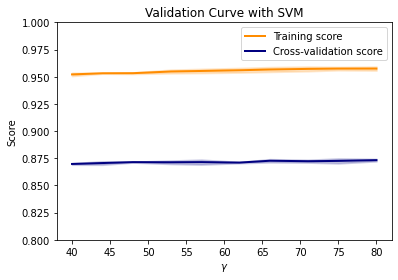

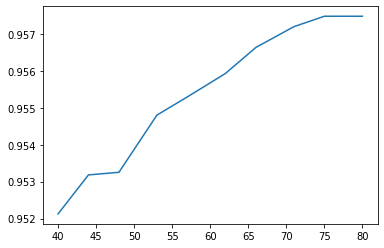

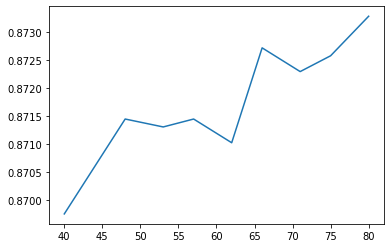

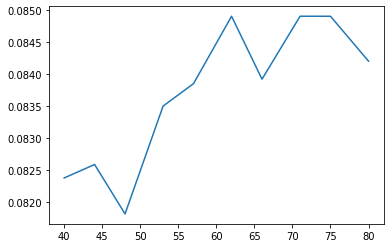

In [ ]:
train_scoreNum_mean = np.mean(train_scoreNum, axis=1)
train_scoreNum_std = np.std(train_scoreNum, axis=1)
test_scoreNum_mean = np.mean(test_scoreNum, axis=1)
test_scoreNum_std = np.std(test_scoreNum, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.8, 1)
lw = 2
plt.plot(num_est, train_scoreNum_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(num_est, train_scoreNum_mean - train_scoreNum_std,
                 train_scoreNum_mean + train_scoreNum_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(num_est, test_scoreNum_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(num_est, test_scoreNum_mean - test_scoreNum_std,
                 test_scoreNum_mean + test_scoreNum_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

plt.plot(num_est, train_scoreNum_mean)
plt.show()

plt.plot(num_est, test_scoreNum_mean)
plt.show()

plt.plot(num_est, train_scoreNum_mean- test_scoreNum_mean)
plt.show()

##sss

#Grid Search

In [ ]:
from sklearn.model_selection import cross_val_score
the_class = RandomForestClassifier(n_estimators=410, max_depth=50, min_samples_split=10, min_samples_leaf=1, max_features= 66)

cvs = cross_val_score(the_class, X, y, cv=5, scoring='neg_mean_squared_error')

the_class, param_grid, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(-cvs))

[0.51692264 0.50031279 0.57535971 0.54692221 0.55824685]


In [ ]:
from sklearn.model_selection import GridSearchCV
vals1 = list(np.linspace(10, 500, 100, dtype=int))

print(vals1)

param_grid = [{'n_estimators': vals1},

              ]
the_class = RandomForestClassifier( max_depth=50, min_samples_split=10, max_features= 66, min_samples_leaf=1, max_leaf_nodes=None, random_state=42)

grid_search = GridSearchCV(the_class, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

[10, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, 104, 108, 113, 118, 123, 128, 133, 138, 143, 148, 153, 158, 163, 168, 173, 178, 183, 188, 193, 198, 203, 207, 212, 217, 222, 227, 232, 237, 242, 247, 252, 257, 262, 267, 272, 277, 282, 287, 292, 297, 302, 306, 311, 316, 321, 326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386, 391, 396, 401, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500]


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=130,
                                              max_features=29,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                      

In [ ]:
grid_search.best_params_

{'n_estimators': 410}

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=130, max_features=29,
                       max_leaf_nodes=1800, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=233,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(cvres["params"][11], np.sqrt(-cvres["mean_test_score"])[11])

{'max_leaf_nodes': None} 0.543520885312434


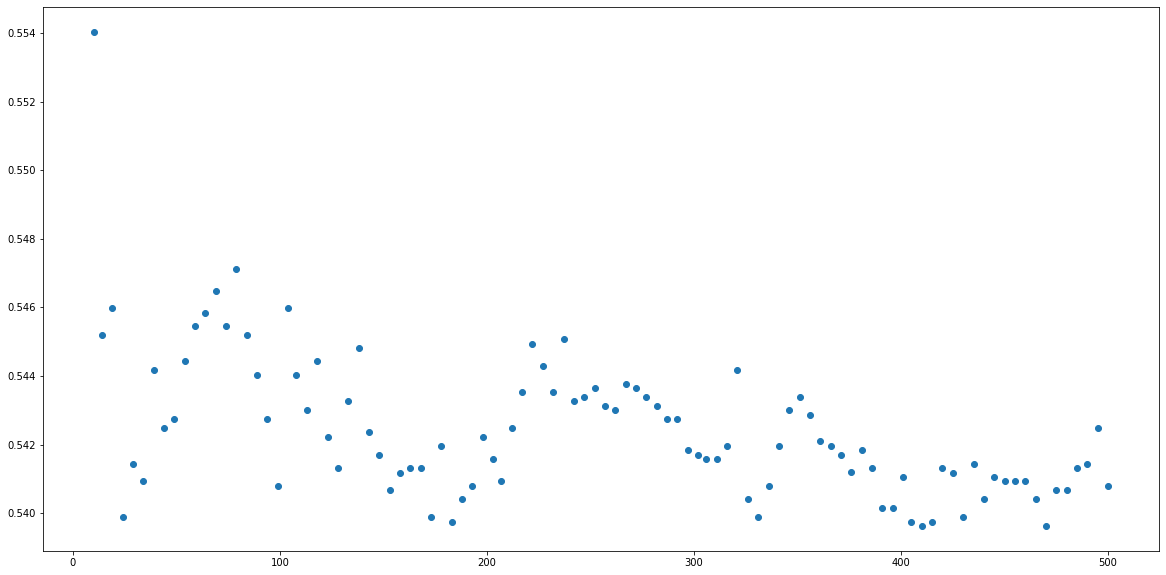

In [ ]:
cvres = grid_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#   print(np.sqrt(-mean_score), params)

# val1 = []
# val2 = []
# for i in cvres["params"]:
#   val1.append(i["max_depth"])
#   val2.append(i["max_depth"])
# print(val1, val2)
plt.figure(figsize=(20, 10))

plt.scatter(vals1, np.sqrt(-cvres["mean_test_score"]))


[1000 1074 1149 1224 1299 1374 1449 1524 1599 1673 1748 1823 1898 1973
 2048 2123 2198 2272 2347 2422 2497 2572 2647 2722 2797 2871 2946 3021
 3096 3171 3246 3321 3396 3470 3545 3620 3695 3770 3845 3920 3995]
[0.1205     0.12942272 0.12228024 0.12091503 0.117398   0.13464338
 0.13250518 0.12040682 0.12414009 0.12522415 0.12271167 0.12589139
 0.12697576 0.11505322 0.12036133 0.13188884 0.12511374 0.12037852
 0.12356199 0.11973576 0.12214658 0.11780715 0.11258028 0.1114989
 0.1158384  0.10971787 0.11252546 0.10906984 0.1124031  0.10879849
 0.1133703  0.10930443 0.11248528 0.10850144 0.10846262 0.11049724
 0.11163735 0.10888594 0.1046814  0.10867347 0.11439299]
[0.33704631 0.3379224  0.33767209 0.33091364 0.33516896 0.32465582
 0.32953692 0.32703379 0.3339174  0.32553191 0.32453066 0.322403
 0.322403   0.32115144 0.32465582 0.32140175 0.32252816 0.31914894
 0.31789737 0.32165207 0.32202753 0.31602003 0.31664581 0.31739675
 0.3175219  0.31476846 0.31914894 0.31214018 0.31113892 0.30838548


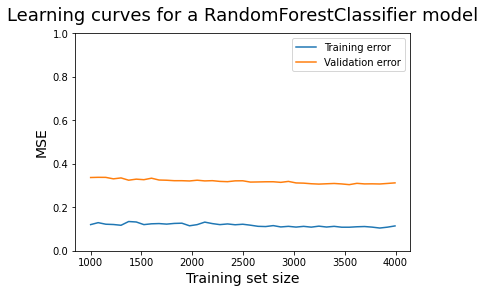

In [ ]:
train_sizes = np.linspace(1000, 3995, 41, dtype=int)
print(train_sizes)
the_class = RandomForestClassifier(n_estimators=410, max_depth=50, min_samples_split=10, min_samples_leaf=1, max_features= 66, max_leaf_nodes=None, random_state=42)

from sklearn.model_selection import learning_curve
def learning_curves(estimator, X, y, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
                                                 estimator, X, y, train_sizes = train_sizes,
                                                 cv = cv, scoring = 'neg_mean_squared_error')
    #print('Training scores:\n\n', train_scores)
    #print('\n', '-' * 70) # separator to make the output easy to read
    #print('\nValidation scores:\n\n', validation_scores)
    train_scores_mean = -train_scores.mean(axis = 1)
    print(train_scores_mean)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    print(validation_scores_mean)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1)

learning_curves(estimator=the_class, X=X_train, y=y_train, cv=2 , train_sizes=train_sizes)

#Error Analysis

In [ ]:
the_class

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features=66,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=410,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
the_class = RandomForestClassifier(n_estimators=410, max_depth=50, min_samples_split=10, min_samples_leaf=1, max_features = 66, random_state=42)


from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
the_class,
algorithm="SAMME.R", learning_rate=0.5, n_estimators=1 , random_state=42)
ada_clf.fit(X_train, y_train)


# the_class.fit(X_train, y_train)
print(ada_clf.classes_)
y_pred_train = ada_clf.predict(X_train)
y_pred_test = ada_clf.predict(X_test)
print(precision_score(y_train, y_pred_train, average='micro'), recall_score(y_train, y_pred_train, average='micro'))
print(precision_score(y_test, y_pred_test, average='micro'), recall_score(y_test, y_pred_test, average='micro'))
print(precision_score(y_train, y_pred_train, average='micro') - precision_score(y_test, y_pred_test, average='micro'))
print(recall_score(y_train, y_pred_train, average='micro') - recall_score(y_test, y_pred_test, average='micro'))

[1 2 3 4]
0.9553646860039425 0.9553646860039425
0.8862612612612613 0.8862612612612613
0.06910342474268127
0.06910342474268127


In [ ]:
for name, score in zip(grievances_data_1.columns, the_class.feature_importances_):
    # if score > 0.01:
      print(name, score)

      [1 2 3 4]
0.9553646860039425 0.9553646860039425
0.8862612612612613 0.8862612612612613
0.06910342474268127
0.06910342474268127

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix1 = confusion_matrix(y_train, y_pred_train)
conf_matrix2 = confusion_matrix(y_test, y_pred_test)
print(conf_matrix1)
print(conf_matrix2)

[[ 390    0   59   11]
 [  23  292   84   19]
 [   3    7 1502   78]
 [   1    0   32 4601]]
[[  68    3   42    9]
 [  10   37   41    5]
 [   5   12  357   47]
 [   2    1   25 1112]]


[ 460  418 1590 4634]


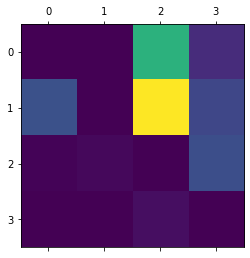

In [ ]:
# [[ 392    0   57   11]
#  [  21  295   83   19]
#  [   3    6 1504   77]
#  [   1    1   34 4598]]
# [[  66    3   45    8]
#  [  11   35   42    5]
#  [   5    9  359   48]
#  [   1    1   23 1115]]



row_sums = conf_matrix1.sum(axis=1, keepdims=True)
print(row_sums.flatten())
norm_conf_mx1 = conf_matrix1 / row_sums
np.fill_diagonal(norm_conf_mx1, 0)
plt.matshow(norm_conf_mx1)#, cmap=plt.cm.gray)
plt.show()

In [ ]:
# cl_a, cl_b, cl_c, cl_d = 1, 2, 3, 4
X_ac = pd.DataFrame(X_test[(y_test == 2) & (y_pred_test == 3)], columns=grievances_data_1.columns)
X_ac2 = pd.DataFrame(X_test[(y_test == 2) & (y_pred_test == 2)], columns=grievances_data_1.columns)

# a = X_ac.apply(pd.Series.unique)
# for i in a:
#   print(len(i))
the = pd.DataFrame(X_test[(y_test == 2)], columns=grievances_data_1.columns)
X_acmean = X_ac.mean(axis=0)
themean = the.mean(axis=0)
for i in range(0, len(themean)):
  if (themean[i] - X_acmean[i]) > 0.1:
    print(the.columns[i], themean[i] - X_acmean[i])

x2_Chamber 0.11670600576973511


In [ ]:
print(X_ac["x2_Chamber"].value_counts())
print(X_ac2["x2_Chamber"].value_counts())
print(the["x2_Chamber"].value_counts())

0.0    33
1.0     8
Name: x2_Chamber, dtype: int64
1.0    21
0.0    16
Name: x2_Chamber, dtype: int64
0.0    64
1.0    29
Name: x2_Chamber, dtype: int64


In [ ]:
the1 = pd.DataFrame(X_train[(y_train == 1)], columns=grievances_data_1.columns)
the2 = pd.DataFrame(X_train[(y_train == 2)], columns=grievances_data_1.columns)
the3 = pd.DataFrame(X_train[(y_train == 3)], columns=grievances_data_1.columns)
the4 = pd.DataFrame(X_train[(y_train == 4)], columns=grievances_data_1.columns)

class = [1,2,3,4]
for i in range(0, 5):
  col = the1.columns[i]
  if len(grievances_data_1[col].unique()) < 3:
    for 

    ax.bar(class, menMeans, width, color='r')
    ax.bar(class, womenMeans, width,bottom=menMeans, color='b')
    print("************************************************", col , "************************************************")
    print("/////////////////////////",1, "/////////////////////////")
    print(the1[col].value_counts())
    print("/////////////////////////",2, "/////////////////////////")
    print(the2[col].value_counts())
    print("/////////////////////////",3, "/////////////////////////")
    print(the3[col].value_counts())
    print("/////////////////////////",4, "/////////////////////////")
    print(the4[col].value_counts())
  


************************************************ separateopinion ************************************************
///////////////////////// 1 /////////////////////////
1.0    252
0.0    208
Name: separateopinion, dtype: int64
///////////////////////// 2 /////////////////////////
1.0    224
0.0    194
Name: separateopinion, dtype: int64
///////////////////////// 3 /////////////////////////
0.0    1155
1.0     435
Name: separateopinion, dtype: int64
///////////////////////// 4 /////////////////////////
0.0    4353
1.0     281
Name: separateopinion, dtype: int64


#Test

In [ ]:
grievances_data_test = pd.read_csv("test.csv", low_memory=False)

In [ ]:
grievances_data_test.drop(columns=["appno", "application","languageisocode", "originatingbody_type", "ecli","sharepointid", "itemid"], axis=1, inplace=True) #Removing only one values

In [ ]:
grievances_data_test = grievances_data_test.drop(labels=zero_list_plus50, axis=1) #too many zero values
grievances_data_test = grievances_data_test.drop(labels="country.name", axis=1)   #repetions

In [ ]:
grievances_data_test["rank"] = grievances_data_test["rank"].astype(int)
grievances_data_test["separateopinion"] = grievances_data_test["separateopinion"].astype(int)

In [ ]:
grievances_data_test = grievances_data_test.drop(labels=Remove_object_list, axis=1)

In [ ]:
grievances_data_test = grievances_data_test.drop(labels="parties.1", axis=1)

In [ ]:
grievances_data_test.describe()

,originatingbody,rank,respondentOrderEng,separateopinion,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,article=56,article=39,article=15,article=25,article=P6,article=19,article=32,article=33,article=53,article=28,article=43,article=52,article=P13,article=16,documentcollectionid=CASELAW,documentcollectionid=JUDGMENTS,documentcollectionid=CHAMBER,documentcollectionid=ENG,documentcollectionid=COMMITTEE,documentcollectionid=GRANDCHAMBER,applicability=,applicability=36,applicability=43,applicability=41,applicability=55,applicability=3,applicability=22,applicability=60,applicability=58,applicability=25,applicability=47,applicability=12,applicability=38,applicability=20,applicability=18,applicability=24,applicability=62,applicability=21,applicability=23,applicability=8,applicability=26,applicability=53,applicability=15,applicability=48,applicability=14,applicability=51,applicability=13,applicability=5,applicability=7,applicability=50,applicability=52,applicability=28,applicability=29,applicability=31,applicability=6,applicability=81,applicability=66,applicability=49,applicability=33,applicability=63,applicability=68,applicability=46,applicability=19,applicability=40,applicability=17,applicability=32,applicability=72,applicability=34,applicability=35,applicability=54,applicability=27,applicability=16,applicability=64,applicability=57,applicability=56,applicability=2,applicability=4,applicability=67,applicability=77,applicability=71,applicability=59,paragraphs=3,paragraphs=6,paragraphs=6-1,paragraphs=6-3-c,paragraphs=P1-3,paragraphs=5,paragraphs=5-1,paragraphs=P1-1,paragraphs=8,paragraphs=8-1,paragraphs=13,paragraphs=10,paragraphs=10-2,paragraphs=10-1,paragraphs=35-1,paragraphs=2,paragraphs=2-1,paragraphs=34,paragraphs=41,paragraphs=38,paragraphs=35,paragraphs=8-2,paragraphs=35-3-a,paragraphs=29-3,paragraphs=4,paragraphs=29,paragraphs=P1-1-1,paragraphs=5-1-e,paragraphs=6-2,paragraphs=5-1-c,paragraphs=14,paragraphs=35-3,paragraphs=6-3-d,paragraphs=5-1-b,paragraphs=5-5,paragraphs=P12-1,paragraphs=11-1,paragraphs=11-2,paragraphs=9,paragraphs=9-1,paragraphs=1,paragraphs=11,paragraphs=6-3,paragraphs=5-3,paragraphs=5-4,paragraphs=46,paragraphs=46-2,paragraphs=5-1-a,paragraphs=P4-2,paragraphs=P4-2-2,paragraphs=17,paragraphs=18,paragraphs=7,paragraphs=7-1,paragraphs=,paragraphs=4-3-d,paragraphs=4-2,paragraphs=6-3-e,paragraphs=9-2,paragraphs=P1-1-2,paragraphs=P4-2-1,paragraphs=37-1-c,paragraphs=37,paragraphs=P7-4,paragraphs=4-1,paragraphs=57,paragraphs=6-3-b,paragraphs=35-3-b,paragraphs=5-1-f,paragraphs=35-4,paragraphs=P4-2-3,paragraphs=2-2,paragraphs=26,paragraphs=27-2,paragraphs=27,paragraphs=36,paragraphs=36-1,paragraphs=37-1,paragraphs=P7-2,paragraphs=35-2,paragraphs=5-1-d,paragraphs=6-3-a,paragraphs=30,paragraphs=46-1,paragraphs=12,paragraphs=P7-1,paragraphs=P7-1-1,paragraphs=36-2,paragraphs=5-2,paragraphs=P1-2,paragraphs=P1-4,paragraphs=56-3,paragraphs=56,paragraphs=56-1,paragraphs=P7-1-2,paragraphs=38-1-a,paragraphs=37-1-b,paragraphs=39,paragraphs=15-1,paragraphs=15,paragraphs=7-2,paragraphs=P4-4,paragraphs=15-3,paragraphs=25-1,paragraphs=25,paragraphs=37-1-a,paragraphs=P6-1,paragraphs=P7-5,paragraphs=19,paragraphs=32,paragraphs=P7-3,paragraphs=33,paragraphs=28-1-a,paragraphs=53,paragraphs=28,paragraphs=35-2-b,paragraphs=43,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,

In [ ]:
grievances_data_test_notcat = grievances_data_test.drop(OneHotEncoderVals, axis=1)
grievances_data_test_cat= grievances_data_test[OneHotEncoderVals]

grievances_data_test_cat_ohe = pd.DataFrame(encoder.transform(grievances_data_test_cat), columns=encoder.get_feature_names())
grievances_data_test_cat_ohe.head()
grievances_data_test_1 = pd.concat([grievances_data_test_notcat, grievances_data_test_cat_ohe.astype(int)], axis=1)
grievances_data_test_1.head()

,originatingbody,rank,respondentOrderEng,separateopinion,typedescription,article=3,article=6,article=P1,article=5,article=8,article=13,article=10,article=2,article=34,article=41,article=38,article=35,article=4,article=29,article=14,article=P12,article=9,article=1,article=11,article=46,article=P4,article=17,article=18,article=7,article=,article=37,article=P7,article=57,article=26,article=27,article=36,article=30,article=12,article=56,article=39,article=15,article=25,article=P6,article=19,article=32,article=33,article=53,article=28,article=43,article=52,article=P13,article=16,documentcollectionid=CASELAW,documentcollectionid=JUDGMENTS,documentcollectionid=CHAMBER,documentcollectionid=ENG,documentcollectionid=COMMITTEE,documentcollectionid=GRANDCHAMBER,applicability=,applicability=36,applicability=43,applicability=41,applicability=55,applicability=3,applicability=22,applicability=60,applicability=58,applicability=25,applicability=47,applicability=12,applicability=38,applicability=20,applicability=18,applicability=24,applicability=62,applicability=21,applicability=23,applicability=8,applicability=26,applicability=53,applicability=15,applicability=48,applicability=14,applicability=51,applicability=13,applicability=5,applicability=7,applicability=50,applicability=52,applicability=28,applicability=29,applicability=31,applicability=6,applicability=81,applicability=66,applicability=49,applicability=33,applicability=63,applicability=68,applicability=46,applicability=19,applicability=40,applicability=17,applicability=32,applicability=72,applicability=34,applicability=35,applicability=54,applicability=27,applicability=16,applicability=64,applicability=57,applicability=56,applicability=2,applicability=4,applicability=67,applicability=77,applicability=71,applicability=59,paragraphs=3,paragraphs=6,paragraphs=6-1,paragraphs=6-3-c,paragraphs=P1-3,paragraphs=5,paragraphs=5-1,paragraphs=P1-1,paragraphs=8,paragraphs=8-1,paragraphs=13,paragraphs=10,paragraphs=10-2,paragraphs=10-1,paragraphs=35-1,paragraphs=2,paragraphs=2-1,paragraphs=34,paragraphs=41,paragraphs=38,paragraphs=35,paragraphs=8-2,paragraphs=35-3-a,paragraphs=29-3,paragraphs=4,paragraphs=29,paragraphs=P1-1-1,paragraphs=5-1-e,paragraphs=6-2,paragraphs=5-1-c,paragraphs=14,paragraphs=35-3,paragraphs=6-3-d,paragraphs=5-1-b,paragraphs=5-5,paragraphs=P12-1,paragraphs=11-1,paragraphs=11-2,paragraphs=9,paragraphs=9-1,paragraphs=1,paragraphs=11,paragraphs=6-3,paragraphs=5-3,paragraphs=5-4,paragraphs=46,paragraphs=46-2,paragraphs=5-1-a,paragraphs=P4-2,paragraphs=P4-2-2,paragraphs=17,paragraphs=18,paragraphs=7,paragraphs=7-1,paragraphs=,paragraphs=4-3-d,paragraphs=4-2,paragraphs=6-3-e,paragraphs=9-2,paragraphs=P1-1-2,paragraphs=P4-2-1,paragraphs=37-1-c,paragraphs=37,paragraphs=P7-4,paragraphs=4-1,paragraphs=57,paragraphs=6-3-b,paragraphs=35-3-b,paragraphs=5-1-f,paragraphs=35-4,paragraphs=P4-2-3,paragraphs=2-2,paragraphs=26,paragraphs=27-2,paragraphs=27,paragraphs=36,paragraphs=36-1,paragraphs=37-1,paragraphs=P7-2,paragraphs=35-2,paragraphs=5-1-d,paragraphs=6-3-a,paragraphs=30,paragraphs=46-1,paragraphs=12,paragraphs=P7-1,paragraphs=P7-1-1,paragraphs=36-2,paragraphs=5-2,paragraphs=P1-2,paragraphs=P1-4,paragraphs=56-3,paragraphs=56,paragraphs=56-1,paragraphs=P7-1-2,paragraphs=38-1-a,paragraphs=37-1-b,paragraphs=39,paragraphs=15-1,paragraphs=15,paragraphs=7-2,paragraphs=P4-4,paragraphs=15-3,paragraphs=25-1,paragraphs=25,paragraphs=37-1-a,paragraphs=P6-1,paragraphs=P7-5,paragraphs=19,paragraphs=32,paragraphs=P7-3,paragraphs=33,paragraphs=28-1-a,paragraphs=53,paragraphs=28,paragraphs=35-2-b,paragraphs=43,paragraphs=4-3-b,paragraphs=4-3-a,paragraphs=4-3,paragraphs=28-3,paragraphs=52,paragraphs=P13-1,paragraphs=P7-4-1,paragraphs=16,paragraphs=P4-3,paragraphs=27-1-b,paragraphs=29-1,paragraphs=32-2,paragraphs=28-1,paragraphs=P6-2,paragraphs=46-4,ccl_article=1,ccl_article=10,ccl_article=11,ccl_article=12,ccl_article=13,ccl_article=14,ccl_article=17,ccl_article=18,ccl_article=2,ccl_article=25,ccl_article=3,

In [ ]:
# grievances_data_test_1 = pd.DataFrame(columnTransformer.transform(grievances_data_test))#, dtype = np.str)

In [ ]:
X_final_test_unscaled = grievances_data_test_1.drop("x2_Plenary", axis=1)

X_final_test = scaler.transform(X_final_test_unscaled)

In [ ]:
grievances_data_test = pd.read_csv("test.csv", low_memory=False)

one = grievances_data_test["appno"]
two = ada_clf.predict(X_final_test)

thedict = {"appno":one , 'importance': two }

y_pred = pd.DataFrame(thedict)
y_pred.to_csv('test_pred.csv', index=False)
# print(the_class.classes_)
# print(precision_score(y_final_test, y_pred, average='micro'), recall_score(y_final_test, y_pred, average='micro'))

In [ ]:
from google.colab import files
files.download('test_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>